### Data-set is-:

To practise multi-class classification, we're going to build a nueral network to classify image of different items of clothing

we are taking tensorflow built-in dataset which is fashion clothing dataset which classify image on basis of clothes, uses 10 classes

Datasets has more than 60k image

`github link` - https://github.com/zalandoresearch/fashion-mnist
`dataset link`- 

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test
(train_data, train_labels), (test_data,test_labels) = fashion_mnist.load_data()

In [2]:
# showing the first data
print(f"Training sample:\n{train_data[0]}\n") # \n means new line
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

Label	Description

0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

#### so our first sample is ankle boot

In [3]:
# Check the shape of single example
train_data[0].shape , train_labels[0].shape

((28, 28), ())

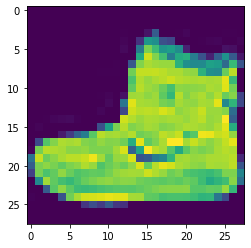

In [4]:
# Plot the single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

2

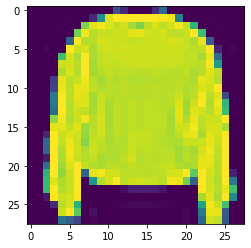

In [5]:
# lets try another one
plt.imshow(train_data[7]);train_labels[7]

### create a small list so we can index onto our training labels so they're human readable


In [6]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Scandal','Shirt','Sneaker','Bag','Ankle Boot']

len(class_names)

10

In [7]:
# Plot an example image and its label
def image_with_label(index_of_choice):
    plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary) # cm is binary as image is grayscale
    plt.title(class_names[train_labels[index_of_choice]])

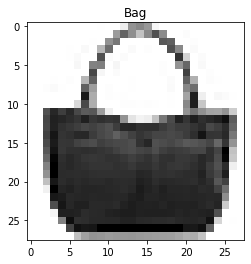

In [8]:
image_with_label(100)

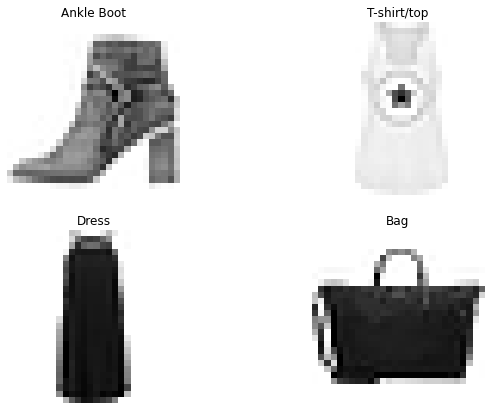

In [9]:
# PLot multiple random image of fashion MNIST
import random
def multiple_random():
    plt.figure(figsize=(10,7))
    for i in range(4):
        ax = plt.subplot(2,2,i+1) # 2 rows , 2 col , index = i+1
        rand_index = random.choice(range(len(train_data)))
        plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
        plt.title(class_names[train_labels[rand_index]])
        plt.axis(False)
        
multiple_random()

## Building a multi-class classification model

For our `multi-class classification model`, we can use a similar architecture to our binary classifiers, however, we're going to have a tweak few things:

* Input shape = 28 x 28 shape of one image e.g train_data[0].shape


* Output shape = 10 (one per class of clothing) e.g len(class_names)

  We'll also change the activation parameter of our output layer to be "softmax" instead of 'sigmoid'. As we'll see the    "softmax" activation function outputs a series of values between 0 & 1 (the same shape as output shape, which together add up    to ~1. The index with the highest value is predicted by the model to be the most likely class.
  
  
* Loss function = tf.keras.losses.CategoricalCrosstentropy()


           * If your labels are one_hot encoded, use `CategoricalCrossentropy`,(e.g. they looked something like [0, 0, 1, 0,...0]
         
   
           * If your labels are integer form , use `SpareCategoricalCrossentropy`
         
* Output layer activation = Softmax (not sigmoid) 


* We'll also use the validation_data parameter when calling the fit() function. This will give us an idea of how the model  performs on the test set during training.

In [10]:
# Our data needs to be flattened from (28 x 28) to (None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

Use this `crossentropy loss function` when there are two or more label classes. We expect labels to be provided in a one_hot representation.

If you want to provide labels as integers, please use `SparseCategoricalCrossentropy loss`. There should be # classes floating point values per feature.



here our label is in integrs so we use `SparsecategoricalCrossentropy loss`

In [11]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # it flatten the input for example if shape is (2,8,6) then it will convert it to (None,96)
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax) #output layer
])

# Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
non_norm_history = model_1.fit(train_data,
                               train_labels,
                               epochs=10,
                               validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 2.1715 - accuracy: 0.1620 - val_loss: 1.7809 - val_accuracy: 0.2077
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.7061 - accuracy: 0.2529 - val_loss: 1.6479 - val_accuracy: 0.2826
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6293 - accuracy: 0.2813 - val_loss: 1.6061 - val_accuracy: 0.2776
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6010 - accuracy: 0.2893 - val_loss: 1.6009 - val_accuracy: 0.3115
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5764 - accuracy: 0.3143 - val_loss: 1.5327 - val_accuracy: 0.3461
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5248 - accuracy: 0.3515 - val_loss: 1.5118 - val_accuracy: 0.3608
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4476 - accuracy: 0.3923 - val_loss: 1.3184 - val_accuracy

# OR use `one hot encode` instead of `SparseCategoricalCrossentropy`

In [12]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax , as 10 different classes are there 
])

# Compile the model
model_12.compile(loss=tf.keras.losses.CategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_12.fit(train_data,
                                tf.one_hot(train_labels,depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels,depth=10))) # see how the model performs on the test set during training





# somehow not working you try and let me know

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1682 - accuracy: 0.1600 - val_loss: 1.7858 - val_accuracy: 0.2101
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7057 - accuracy: 0.2535 - val_loss: 1.6487 - val_accuracy: 0.2945
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6350 - accuracy: 0.2811 - val_loss: 1.6191 - val_accuracy: 0.2767
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6120 - accuracy: 0.2866 - val_loss: 1.6136 - val_accuracy: 0.2976
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5976 - accuracy: 0.2973 - val_loss: 1.5981 - val_accuracy: 0.2851
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5903 - accuracy: 0.3025 - val_loss: 1.5685 - val_accuracy: 0.3137
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5773 - accuracy: 0.3202 - val_loss: 1.5671 - val_accuracy:

In [13]:
tf.one_hot(train_labels,depth=10)

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [14]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


#### Nueral Networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find pattern b/w 0&1 

In [15]:
train_data.min(),train_data.max()

(0, 255)

### We can get our training and testing data between 0 & 1 by divinding by the maximum (255)


In [16]:
train_data_norm = train_data/ 255.0 # 255.0 is float so we can get the value b/w 0 or 1
test_data_norm = test_data/255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [17]:
# Now as our data is normalised

# set the random seed
tf.random.set_seed(42)

# Create the model 
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
norm_history = model_2.fit(train_data_norm,
                           train_labels,
                          epochs=10,
                          validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

###  Nueral network tends to prefer data in numerical form as well as scaled/normalized (numbers between 0 and 1) you can as we normalize our data our accuracy shot from 35% to 80% 🚀🚀🚀


In [18]:
# to see work of ''.history'
a=norm_history.history
a

{'loss': [1.0347838401794434,
  0.6375991702079773,
  0.5942121148109436,
  0.5749582648277283,
  0.5641123056411743,
  0.5544357895851135,
  0.5487954020500183,
  0.5428295135498047,
  0.5372939109802246,
  0.5359908938407898],
 'accuracy': [0.647433340549469,
  0.7756666541099548,
  0.7913833260536194,
  0.7979166507720947,
  0.800599992275238,
  0.8042666912078857,
  0.8062833547592163,
  0.8077333569526672,
  0.8096500039100647,
  0.812416672706604],
 'val_loss': [0.6937333941459656,
  0.6400147080421448,
  0.6247133016586304,
  0.6077598929405212,
  0.6168836355209351,
  0.585527777671814,
  0.6096576452255249,
  0.5786883234977722,
  0.5698306560516357,
  0.5658250451087952],
 'val_accuracy': [0.7616999745368958,
  0.7820000052452087,
  0.7782999873161316,
  0.788100004196167,
  0.788100004196167,
  0.7950999736785889,
  0.7835999727249146,
  0.7971000075340271,
  0.7976999878883362,
  0.8014000058174133]}

In [19]:
import pandas as pd
a=pd.DataFrame(non_norm_history.history)
a

,loss,accuracy,val_loss,val_accuracy
0,2.168207,0.160017,1.785844,0.2101
1,1.705738,0.253517,1.648699,0.2945
2,1.634971,0.281133,1.619076,0.2767
3,1.612041,0.286567,1.613583,0.2976
4,1.597612,0.297250,1.598131,0.2851
5,1.590296,0.302533,1.568507,0.3137
6,1.577274,0.320200,1.567135,0.3222
7,1.574495,0.320633,1.569524,0.3358
8,1.579787,0.318150,1.562359,0.3274
9,1.564911,0.324200,1.552138,0.3369


<AxesSubplot:title={'center':'Normalized data'}>

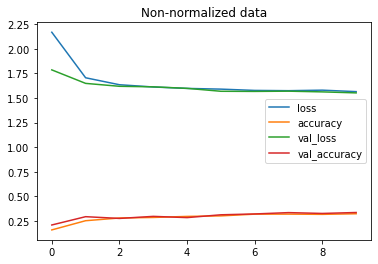

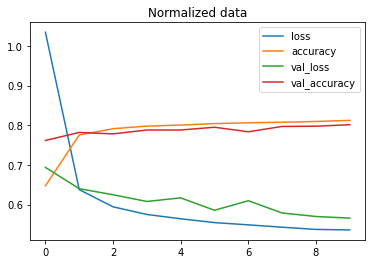

In [20]:
import pandas as pd

# Plot the non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")

# Plot the normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

## Note -:
The same model with even slightly different data can produce dramatically different results. So when you're comparing models, it's important to make sure you're comparing them on the same critera (e.g same architecture but different data or same data but different architecture)

## Finding the ideal learning rate

In [21]:
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_3.fit(train_data_norm,
                             train_labels,
                             epochs=40,
                             validation_data=(test_data_norm, test_labels),
                             callbacks = lr_scheduler
                             )

Epoch 1/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 3s

<AxesSubplot:title={'center':'Using scheduler callback'}>

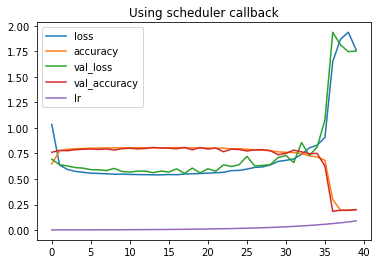

In [22]:
pd.DataFrame(find_lr_history.history).plot(title="Using scheduler callback")

### Plot the learning rate decay value

Text(0.5, 1.0, 'Finding the ideal learning rate')

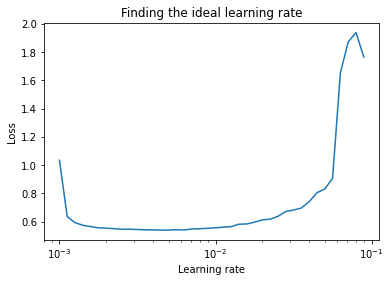

In [23]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]); # Make a plot with log scaling on the x axis.
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

Here we can see our good lr is where we have lowest loss i.e here it is 10**-3

In [24]:
# Lets fill the best learning rate
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])



# Fit the model
lr_history = model_3.fit(train_data_norm,
                             train_labels,
                             epochs=20,
                             validation_data=(test_data_norm, test_labels),
                             
                             )

C:\Users\Amit\Desktop\sample\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

<AxesSubplot:title={'center':'with applying best learning rate'}>

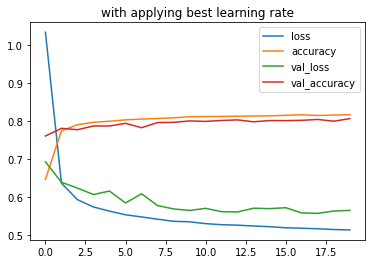

In [25]:
pd.DataFrame(lr_history.history).plot(title="with applying best learning rate")

### Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
    * Evaluate its performance using other classification metrics (such as a confusion matrix)
    
    * Asses some of its predictions (through visualizations)
    
    * Improve its results (by training it for longer or changing the archictecture)
    
    * Save and export it for use in an application
    
Let's go through top 2.....

In [26]:
# Note : the confusion matrix code we're about to write is remix of scikit-learn's plot_confusion_matrix #92

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15):

    # Create the confusion matrix
    cm = confusion_matrix(y_true,tf.math.round(y_pred))
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] # normalize our confusion matrix
    n_classes = cm.shape[0]
    

    # Lets prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm , cmap=plt.cm.Blues) # here cmp cm is colour matrix
    fig.colorbar(cax)

    # Set labels to be classes
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title = "Confusion Matrix",
           xlabel= "Predicted Label",
           ylabel= "True Label",
           xticks= np.arange(n_classes),
           yticks= np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)

    # Set the x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust the label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set the threshold for different color
    threshold = (cm.max() + cm.min()) / 2.

    # PLot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j]> threshold else "black",
                size=text_size)


In [27]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Scandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

## Make some prediction with our models

🔑 Remember to make prediction on the same kind of data your model was trained on (e.g if your model was trained on normalized data, you'll want to make predictions on normalized data )

In [28]:
y_probs = model_3.predict(test_data_norm) # probs is short for "prediction probabilities"
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[8.5630149e-11, 3.5362037e-13, 2.6633807e-05, 4.6356206e-08,
        5.0949708e-05, 9.6119240e-02, 8.1778047e-08, 9.1868855e-02,
        4.0605320e-03, 8.0787367e-01],
       [3.4278621e-06, 1.2899364e-16, 9.5989150e-01, 2.0516296e-07,
        1.5329202e-02, 2.4532527e-13, 2.4142891e-02, 1.1383795e-28,
        6.3272048e-04, 4.4789726e-08],
       [6.1062834e-05, 9.9657685e-01, 4.3867235e-08, 3.3405807e-03,
        1.3249601e-05, 1.4383547e-21, 8.2790775e-06, 7.3238315e-18,
        5.4811505e-08, 4.9225811e-14],
       [7.5031443e-05, 9.9053699e-01, 4.2529024e-07, 9.2231566e-03,
        1.3623299e-04, 1.8276651e-18, 2.6808451e-05, 4.8124838e-14,
        1.4521551e-06, 2.2211717e-11],
       [7.2189935e-02, 1.5495737e-06, 2.5566912e-01, 1.0363134e-02,
        4.3541323e-02, 1.1069491e-13, 6.1693013e-01, 6.7544663e-23,
        1.3049198e-03, 1.2140428e-09]], dtype=float32)

 As you can see all the value about will be in between 0 and 1 (e-11 means nearly .00000 11times 8)
    
 so to get the values we can or get the integer value we gonna use `argmax`

In [29]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])] # here it searching class_names->y_probs->given index ->argmax round it up

(array([8.5630149e-11, 3.5362037e-13, 2.6633807e-05, 4.6356206e-08,
        5.0949708e-05, 9.6119240e-02, 8.1778047e-08, 9.1868855e-02,
        4.0605320e-03, 8.0787367e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle Boot')

In [30]:
# Convert all of the prediction probabilities to all the integer
y_preds = y_probs.argmax(axis=1) # First axis
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [31]:
# compare test_labels and y_preds
test_labels[:10] == y_preds[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [32]:
### in confusion matrix diagonal value always gives the largest value
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)


array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]], dtype=int64)

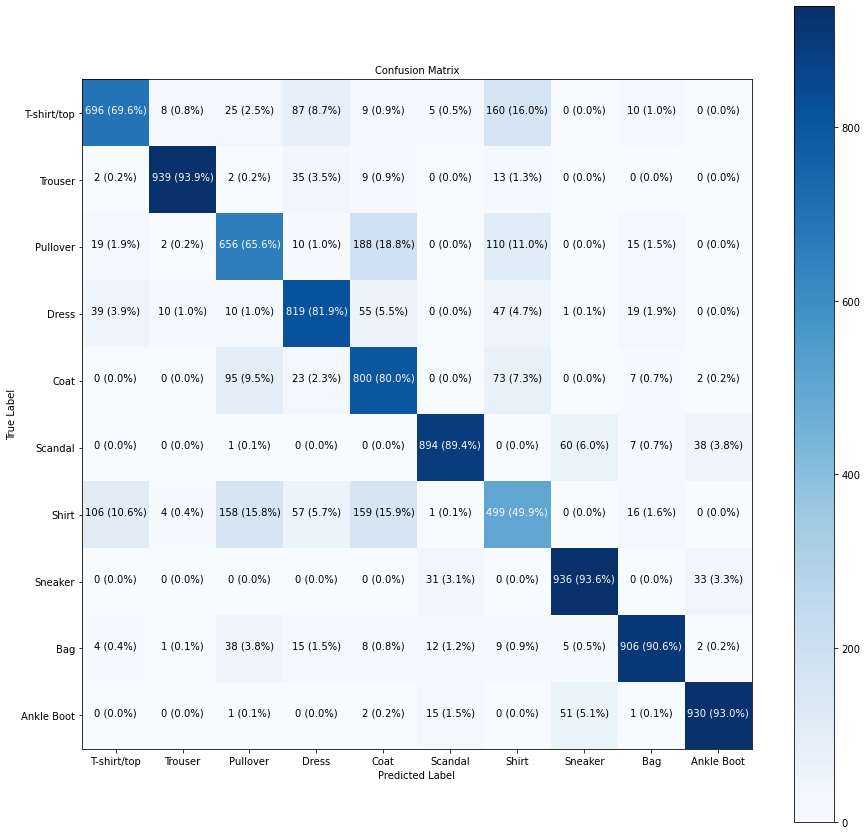

In [33]:
# Make a pretty confusion matrixx
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)

🔑 **Note** - Often when working with images and other forms of visual data, it's good idea to visualize as much as possible to develop a further understanding of the data and inputs and outputs of your models

#### How about we create a little function for:

* Plot a random image
* make prediction on said image
* Label the plot with the truth label and the predicted label

('Ankle Boot', 'Ankle Boot')

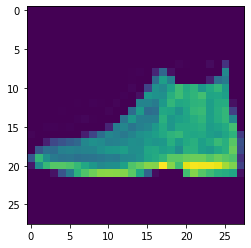

In [34]:
# Rough approach code by myself only
plt.imshow(test_data[0])
a=class_names[y_preds[0]]
b=class_names[test_labels[0]]
a,b

In [35]:
import matplotlib.pyplot as plt
def image_show(n):
    plt.imshow(test_data[n])
    print("Predicted label - ",class_names[y_preds[n]])
    plt.imshow(test_data[n])
    print("Truth label - ",class_names[test_labels[n]])
    

Predicted label -  Trouser
Truth label -  Trouser


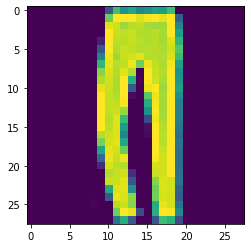

In [36]:
image_show(2)

In [58]:
## make the funcion
import random

def plot_random_image(model, images, true_labels, classes):
    """
    Picks up a random image, plot it and labels it with prediction and truth label
    """
    # Set up random integer
    i = random.randint(0,len(images))
    
    # Create prediction and images
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1,28,28)) # 1 image 28 x 28 size
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]] 
    
    # Plot the image
    plt.imshow(target_image,cmap = plt.cm.binary)
    
    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
                    color = "green"

    else:
        color = "red"
    
    # Add the xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True:{})".format(pred_label,
                                                  100*tf.reduce_max(pred_probs), # max value in pred_probs
                                                  true_label),
              color=color) # Set the color to green or red based on if prediction is right or wrong

1/1 [==============================] - 0s 12ms/step


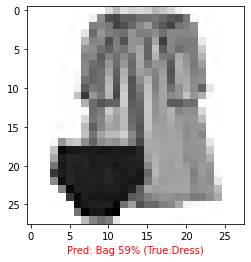

In [59]:
plot_random_image(model=model_3,
                  images=test_data_norm, # always make predictions on the same kind of data your model is trained on
                  true_labels=test_labels,
                  classes=class_names) 

## What pattern in our model learning?

In [60]:
# Find the layers of our most recent model
model_3.layers

In [61]:
# Extract a particular layer
model_3.layers[1]

### Get the pattern of layer in our network

In [64]:
weights, biases = model_3.layers[1].get_weights() # (weight & biases -> can be called as o/p)

# Shapes
weights, weights.shape 

# here 784 is - 28x28 and 4 is number of hidden units
# means it learns 4 number at one time to 784 times

(array([[ 0.7150266 , -0.06077115, -0.99763054, -1.0484313 ],
        [ 0.27732134, -0.47155404, -0.5291646 ,  0.02329272],
        [ 0.77524316,  0.5402757 , -1.1288565 , -0.7426151 ],
        ...,
        [-0.3945338 ,  0.47628647, -0.22641523,  0.2550592 ],
        [-0.40515807,  0.6181004 ,  0.23928443, -0.5038762 ],
        [ 0.23884568,  0.1160692 , -0.1213136 ,  0.04352422]],
       dtype=float32),
 (784, 4))

In [63]:
28 * 28

784

In [65]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 3140      
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


### Now let's check out the bias vector...

In [66]:
# Bias and biases shapes
biases, biases.shape # first layer of model-3

(array([ 2.4486156e-02, -6.1503169e-04, -2.7230170e-01,  8.1124920e-01],
       dtype=float32),
 (4,))

**Every nueron has a bias vector. Each of these is paired with a weights matrix.**

**The bias vector got initialized as zeros (at least in case of tensorflow dense layer).**

**The bias vector dictates how much the pattern within the corresponding weights matrix should influence next layer**
 

### For each layer in output its previous layers works as its input as one layer affects the working and flow of another layer

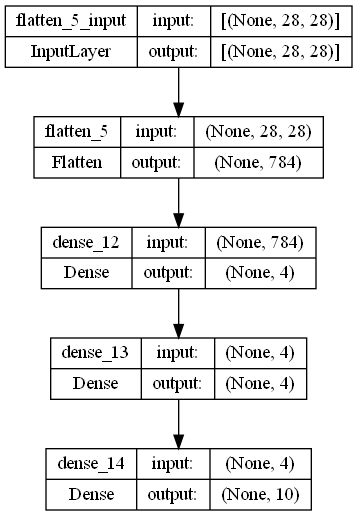

In [68]:
# Let's check another way of viewing our deep laearning models
from tensorflow.keras.utils import plot_model
# see the input and output of each layer
plot_model(model_3,show_shapes=True)

#### 10 is how many classes we have